In [ ]:
import zipfile

In [ ]:
#Unzip dataset

local_zip = 'garbage_dataset.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import pathlib
data_dir = "Garbage classification/Garbage classification"
data_dir = pathlib.Path(data_dir)

In [ ]:
#Count image dataset
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2527


In [ ]:
#Train and Validation Data
batch_size = 32
img_height = 150
img_width = 150

train_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  shuffle=True,
  seed=123,
  validation_split=0.2,
  subset="training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_data = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  shuffle=True,
  seed=123,
  validation_split=0.2,
  subset="validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

categories = train_data.class_names
print(categories)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.
Found 2527 files belonging to 6 classes.
Using 505 files for validation.
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


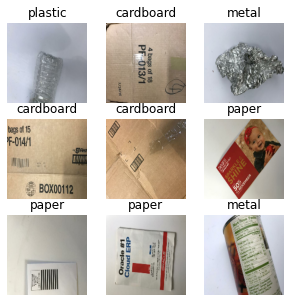

In [ ]:
#Plot the Image
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 5))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(categories[labels[i]])
    plt.axis("off")

In [ ]:
#Autotune Train and Validation Data
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().shuffle(500).prefetch(buffer_size=AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Data Augmentation Layers
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal_and_vertical",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
  ]
)

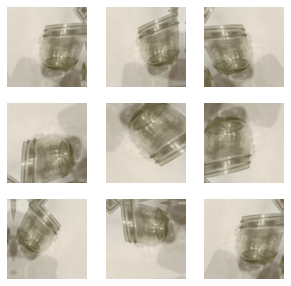

In [ ]:
#Implementation Data Augmentation
plt.figure(figsize=(5, 5))
for images, _ in train_data.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
#Sequential Layers
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255, input_shape=(150, 150, 3)),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(256, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(512, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Flatten(),
  layers.Dense(512, activation='relu'),
  layers.Dropout(0.2),
  layers.Dense(6, activation='softmax')
])

In [ ]:
#Compile the Model
model.compile(optimizer=tf.keras.optimizers.Adam(),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(name='sparse_categorical_crossentropy'),
                metrics=['accuracy'])

In [ ]:
#Summary of the Model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 150, 150, 3)       0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                  

In [ ]:
#Training Data Process
epochs=50
history = model.fit(
  train_data,
  validation_data=val_data,
  epochs=epochs
)

Epoch 1/50
64/64 [==============================] - 311s 5s/step - loss: 1.7542 - accuracy: 0.2117 - val_loss: 1.7199 - val_accuracy: 0.2475
Epoch 2/50
64/64 [==============================] - 307s 5s/step - loss: 1.5703 - accuracy: 0.3328 - val_loss: 1.5136 - val_accuracy: 0.3485
Epoch 3/50
64/64 [==============================] - 306s 5s/step - loss: 1.4654 - accuracy: 0.3897 - val_loss: 1.3743 - val_accuracy: 0.4455
Epoch 4/50
64/64 [==============================] - 305s 5s/step - loss: 1.3796 - accuracy: 0.4382 - val_loss: 1.3430 - val_accuracy: 0.4673
Epoch 5/50
64/64 [==============================] - 305s 5s/step - loss: 1.3560 - accuracy: 0.4565 - val_loss: 1.2637 - val_accuracy: 0.4931
Epoch 6/50
64/64 [==============================] - 305s 5s/step - loss: 1.2545 - accuracy: 0.5074 - val_loss: 1.4104 - val_accuracy: 0.4970
Epoch 7/50
64/64 [==============================] - 305s 5s/step - loss: 1.2223 - accuracy: 0.5143 - val_loss: 1.1735 - val_accuracy: 0.5168
Epoch 8/50
64

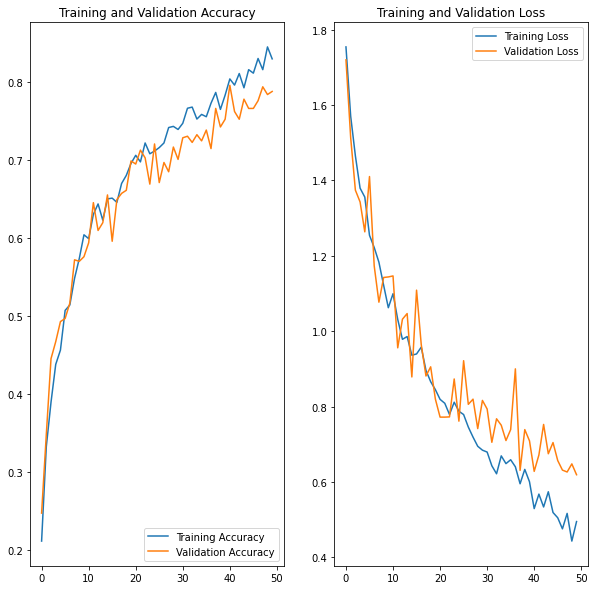

In [ ]:
#Plot the Accuracy and Loss of Model
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
#Unzip Test Data
local_zip = 'gar_pred.zip'
zip_ref   = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
test_dir = "gar_pred"
test_dir = pathlib.Path(test_dir)

In [ ]:
test_ds = tf.keras.utils.image_dataset_from_directory(
  test_dir,
  shuffle=True,
  image_size=(img_height, img_width))

Found 15 files belonging to 6 classes.


In [ ]:
#Evaluate the Model with Test Data
loss, accuracy = model.evaluate(test_ds)
print('Test accuracy :', accuracy)

1/1 [==============================] - 1s 602ms/step - loss: 1.7915 - accuracy: 0.8667
Test accuracy : 0.8666666746139526


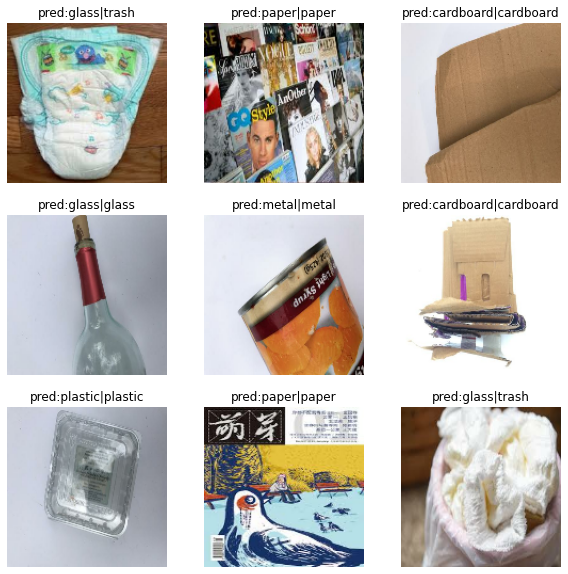

In [ ]:
#Predict on Test Data
import numpy as np
plt.figure(figsize=(10, 10))

for images, labels in test_ds.take(1):
  classify = model(images)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title('pred:{}|{}'.format(categories[np.argmax(classify[i])], categories[labels[i]]))
    plt.axis("off")

In [ ]:
#Export to H5 File
model.save('model.h5')

In [ ]:
model.save_weights('saved_weights.h5')

In [ ]:
model.save('trashcon_model')

INFO:tensorflow:Assets written to: trashcon_model/assets


In [ ]:
export_dir = "saved_model/"
tf.saved_model.save(model, export_dir)

converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)
tflite_model = converter.convert()

with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: saved_model/assets


In [ ]:
from google.colab import files

In [ ]:
#Download saved model
!zip -r /content/trashcon_model.zip /content/trashcon_model

updating: content/trashcon_model/ (stored 0%)
updating: content/trashcon_model/variables/ (stored 0%)
updating: content/trashcon_model/variables/variables.data-00000-of-00001 (deflated 33%)
updating: content/trashcon_model/variables/variables.index (deflated 67%)
updating: content/trashcon_model/keras_metadata.pb (deflated 93%)
updating: content/trashcon_model/saved_model.pb (deflated 89%)
updating: content/trashcon_model/assets/ (stored 0%)


In [ ]:
files.download('/content/trashcon_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!zip -r /content/saved_model.zip /content/saved_model

  adding: content/saved_model/ (stored 0%)
  adding: content/saved_model/variables/ (stored 0%)
  adding: content/saved_model/variables/variables.data-00000-of-00001 (deflated 33%)
  adding: content/saved_model/variables/variables.index (deflated 67%)
  adding: content/saved_model/saved_model.pb (deflated 89%)
  adding: content/saved_model/assets/ (stored 0%)


In [ ]:
files.download('/content/saved_model.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>